In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

### To-do
&nbsp;&nbsp;1. Download the data and get the tensors <br>
&nbsp;&nbsp;2. Create the model <br>
&nbsp;&nbsp;3. Train the model and check while training <br>
&nbsp;&nbsp;4. Plot loss and accuracy model<br>
&nbsp;&nbsp;5. Check for full test data dump<br>
&nbsp;&nbsp;6. Check the confusion matrix<br>

#### 1. Download the data and get the tensors <br>

In [4]:
transform=transforms.ToTensor()

In [5]:
train_data_base=datasets.MNIST(root='../Data', train=True, download=True, transform=transform)
test_data_base=datasets.MNIST(root='../Data',train=False, download=True,transform=transform)

In [6]:
test_data_base

Dataset MNIST
    Number of datapoints: 10000
    Root location: ../Data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [7]:
train_load=DataLoader(train_data_base,batch_size=10,shuffle=True)
test_load=DataLoader(test_data_base,batch_size=10)

In [8]:
len(test_load)

1000

In [9]:
for train_load_index, train_load_sample in enumerate(train_load):
    break

In [10]:
train_load_sample[0].shape

torch.Size([10, 1, 28, 28])

#### 2. Create the model <br>

In [11]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1=nn.Conv2d(1,6,3,1) # calc of new dimensions = ((orig_dimension +2*padding -kernel)/stride) +1
        self.conv2=nn.Conv2d(6,16,3,1)
        self.lin1=nn.Linear(5*5*16,120)
        self.lin2=nn.Linear(120,84)
        self.lin3=nn.Linear(84,10)
        
    def forward(self,X):
        X=F.relu(self.conv1(X))
        X=F.max_pool2d(X,2,2)
        X=F.relu(self.conv2(X))
        X=F.max_pool2d(X,2,2)
        X = X.view(-1, 5*5*16)
        X=F.relu(self.lin1(X))
        X=F.relu(self.lin2(X))
        X=self.lin3(X)
        return F.log_softmax(X,dim=1)
     
        

In [12]:
torch.manual_seed(42)
model = Model()
model

Model(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (lin1): Linear(in_features=400, out_features=120, bias=True)
  (lin2): Linear(in_features=120, out_features=84, bias=True)
  (lin3): Linear(in_features=84, out_features=10, bias=True)
)

In [13]:
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.001)

#### 3. Train the model and check while training

In [14]:
epochs=10

In [15]:
import time

In [16]:
train_epoch_acc=[]
test_epoch_acc=[]
train_losses=[]
test_losses=[]
time_start=time.time()
for e in range(epochs):
    e+=1
    train_batch_acc=[]
    test_batch_acc=[]
    print('***ENTERING TRAIN***')
    for i, (x_train,y_train) in enumerate(train_load):
        i+=1
        calc_acc=0
        loss=0
        y_train_pred=model(x_train)
#         print('actual index',y_train_pred.argmax(dim=1))
#         print('y_train',y_train)
        calc_acc=(y_train_pred.argmax(dim=1)==y_train).sum()
        #print('accuracy of batch:',calc_acc)
#         print(f' sum for the batch:',calc_acc.item())
        train_batch_acc.append(calc_acc)
        loss=criterion(y_train_pred, y_train)
        if i%200==0:
#             print('sum of accuracies', calc_acc)
#             print(i)
            print(f' epoch {e} , batch{i} ,loss={loss} , acc={(calc_acc*100)/(10)} %')
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    train_losses.append(loss)        
    train_epoch_acc.append(train_batch_acc)
    with torch.no_grad():
        print('***ENTERING TEST***')
        for i,(x_test,y_test) in enumerate(test_load):
            i+=1
            calc_acc=0
            y_test_pred=model(x_test)
            calc_acc=(y_test_pred.argmax(dim=1)==y_test).sum()
            #print(calc_acc)
            test_batch_acc.append(calc_acc)
            loss=criterion(y_test_pred,y_test)
            if i%200==0:
#             print('sum of accuracies', calc_acc)
#             print(i)
                print(f' epoch {e} , batch{i} ,loss={loss} , acc={(calc_acc*100)/(10)} %')
        test_losses.append(loss) 
        test_epoch_acc.append(test_batch_acc)
time_end=time.time()        
        

***ENTERING TRAIN***


E:\Anaconda\envs\pytorchenv\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


 epoch 1 , batch200 ,loss=0.7212586998939514 , acc=90.0 %
 epoch 1 , batch400 ,loss=0.2837105989456177 , acc=90.0 %
 epoch 1 , batch600 ,loss=0.042550548911094666 , acc=100.0 %
 epoch 1 , batch800 ,loss=0.04917153716087341 , acc=100.0 %
 epoch 1 , batch1000 ,loss=0.887790322303772 , acc=90.0 %
 epoch 1 , batch1200 ,loss=0.07605952024459839 , acc=100.0 %
 epoch 1 , batch1400 ,loss=0.6689823865890503 , acc=80.0 %
 epoch 1 , batch1600 ,loss=0.5472081899642944 , acc=80.0 %
 epoch 1 , batch1800 ,loss=0.30995577573776245 , acc=80.0 %
 epoch 1 , batch2000 ,loss=0.29164567589759827 , acc=90.0 %
 epoch 1 , batch2200 ,loss=0.0553242452442646 , acc=100.0 %
 epoch 1 , batch2400 ,loss=0.02016785740852356 , acc=100.0 %
 epoch 1 , batch2600 ,loss=0.20258080959320068 , acc=90.0 %
 epoch 1 , batch2800 ,loss=0.011036296375095844 , acc=100.0 %
 epoch 1 , batch3000 ,loss=0.007437355816364288 , acc=100.0 %
 epoch 1 , batch3200 ,loss=0.006589758209884167 , acc=100.0 %
 epoch 1 , batch3400 ,loss=0.1100250259

In [17]:
len(test_losses)

10

#### 4. Plot loss and accuracy model

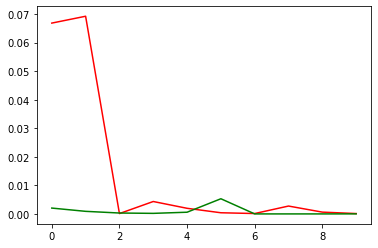

In [34]:
plt.plot(range(epochs),[i.detach().numpy() for i in train_losses],'r')
plt.plot(range(epochs),[i.detach().numpy() for i in test_losses],'g')
plt.show()


In [19]:
train_eps=[]
for eps in train_epoch_acc:
    train_eps.append(np.sum(eps)*100/60000)

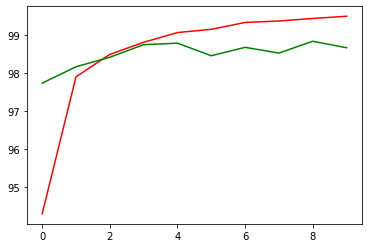

In [20]:
plt.plot(range(epochs),[np.sum(eps)*100/60000 for eps in train_epoch_acc],'r')
plt.plot(range(epochs),[np.sum(eps)*100/10000 for eps in test_epoch_acc],'g')
plt.show()

In [21]:
test_eps=[]
for eps in test_epoch_acc:
    test_eps.append(np.sum(eps)*100/10000)

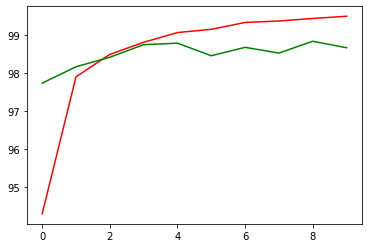

In [22]:
plt.plot(range(epochs),train_eps,'r')
plt.plot(range(epochs),test_eps,'g')
plt.show()


#### 5. Check for full test data dump

In [23]:
## Try full test data
full_test=DataLoader(test_data_base,batch_size=10000)
for x_test,y_test in full_test:
    break

In [24]:
x_test.shape

torch.Size([10000, 1, 28, 28])

In [25]:
with torch.no_grad():
    y_test_final_preds=model(x_test)
    acc_final=(y_test_final_preds.argmax(dim=1)==y_test).sum()
    acc=acc_final/10000
    print(y_test_final_preds.shape, y_test.shape)
    loss=criterion(y_test_final_preds,y_test)

torch.Size([10000, 10]) torch.Size([10000])


In [26]:
print(f'accuracy: {acc*100} \t loss={loss}')

accuracy: 98.65999603271484 	 loss=0.05305424705147743


#### 6. Confusion Matrix

In [27]:
import sklearn
from sklearn.metrics import confusion_matrix

In [33]:
print(confusion_matrix(y_test,y_test_final_preds.argmax(dim=1)))

[[ 969    0    0    0    0    2    3    1    1    4]
 [   0 1132    1    1    0    1    0    0    0    0]
 [   1    3 1015    3    2    0    0    4    4    0]
 [   0    1    0  994    0   11    0    1    3    0]
 [   0    1    2    0  972    0    2    0    1    4]
 [   0    0    0    5    0  884    1    0    1    1]
 [   3    2    2    0    6    3  940    0    2    0]
 [   0    6    6    0    0    0    0 1014    2    0]
 [   1    1    3    3    0    2    0    2  960    2]
 [   0    3    1    3    3    6    0    3    4  986]]
